# Online Retail Data
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company
mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The project work consists of demonstrating an aspect of the course using the selected 'Online Retail' dataset.

## Data set description
- **Source:** UK-based online retailer (year 2010-2011)
- **Rows:** Each row represents a transaction.
- **Columns:**
  - `InvoiceNo`: Invoice number
  - `StockCode`: Product code
  - `Description`: Product description
  - `Quantity`: Number of items purchased
  - `InvoiceDate`: Date/time of the invoice
  - `UnitPrice`: Price per unit
  - `CustomerID`: Customer ID
  - `Country`: Country of the customer

---

# Import data

In [1]:
import pandas as pd
import numpy as np

file_path = 'Dataset_Online_Retail_Cleaned_Transformed.csv'
df = pd.read_csv(file_path)

df_cleaned = df.copy()

df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319752 entries, 0 to 319751
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       319752 non-null  int64  
 1   StockCode       319752 non-null  object 
 2   Description     319752 non-null  object 
 3   Quantity        319752 non-null  int64  
 4   InvoiceDate     319752 non-null  object 
 5   UnitPrice       319752 non-null  float64
 6   CustomerID      319752 non-null  float64
 7   Country         319752 non-null  object 
 8   TotalPrice      319752 non-null  float64
 9   PCA_1D          319752 non-null  float64
 10  Month           319752 non-null  object 
 11  Week            319752 non-null  object 
 12  Day             319752 non-null  int64  
 13  UnitPriceBin    319752 non-null  object 
 14  SpendLevel      319752 non-null  object 
 15  GeneralCountry  319752 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 39.0+ M

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

     PCA_1D    Month                   Week  Day    UnitPriceBin SpendLevel  \
0 -0.324517  2010-12  2010-11-29/2010-12-05    2  (1.501, 3.001]  Very High   
1 -0.708712  2010-12  2010-11-29/2010-12-05    2    (3.001, 4.5]  Very High   
2 -0.207320  2010-12  2010-11-29/2010-12-05    2  (1.501, 3.001]  Very High   
3 -0.708712  2010-12  2010-11-29/2010-12-05    2    (3.001, 4.5]  Very High   
4 -0.708712  2010-12  2010-11-29/2010-12-05    2    (3.001, 4.5]  Very High   

   GeneralCountry  
0  United Kingdom  
1  United Kingdom  
2  United Kingdom  
3  United Kingdom  
4  United Kingdom

---
# 1. Data Preprocessing

<h2 style="color:#d36c87;">1.1. Data cleaning</h2>

### Handling Missing Values

In [2]:
df_cleaned.isnull().sum()

df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

### Remove Duplicates

In [3]:
df_cleaned = df_cleaned.drop_duplicates()

### Check and Convert Data Types

In [4]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

### Check Invalid Values

In [5]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

### Identify and Remove Outliers

In [6]:
# Quantity Outliers
Q1_q = df_cleaned['Quantity'].quantile(0.25)
Q3_q = df_cleaned['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= Q1_q - 1.5 * IQR_q) & (df_cleaned['Quantity'] <= Q3_q + 1.5 * IQR_q)]

#UnitPrice Outliers
Q1_p = df_cleaned['UnitPrice'].quantile(0.25)
Q3_p = df_cleaned['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
df_cleaned = df_cleaned[(df_cleaned['UnitPrice'] >= Q1_p - 1.5 * IQR_p) & (df_cleaned['UnitPrice'] <= Q3_p + 1.5 * IQR_p)]

### Feature Engineering

In [7]:
# TotalPrice = Quantity * UnitPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

### Export Clean Dataset

In [8]:
df_cleaned.to_csv("Dataset_Online_Retail_Cleaned.csv", index=False)

<h2 style="color:#d36c87;">1.2. Data integration</h2>

In [9]:
numerical_df = df_cleaned[['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']].dropna()

### Covariance & Correlation Analysis

Covariance Matrix:
               Quantity  UnitPrice    CustomerID   TotalPrice
Quantity      46.172904  -3.030952 -1.616118e+03    44.978298
UnitPrice     -3.030952   1.640027  6.907516e-03     5.020494
CustomerID -1616.118168   0.006908  2.887713e+06 -2401.276500
TotalPrice    44.978298   5.020494 -2.401276e+03   140.869940

--------------------------

Correlation Matrix:
            Quantity  UnitPrice  CustomerID  TotalPrice
Quantity    1.000000  -0.348305   -0.139960    0.557700
UnitPrice  -0.348305   1.000000    0.000003    0.330302
CustomerID -0.139960   0.000003    1.000000   -0.119057
TotalPrice  0.557700   0.330302   -0.119057    1.000000

--------------------------



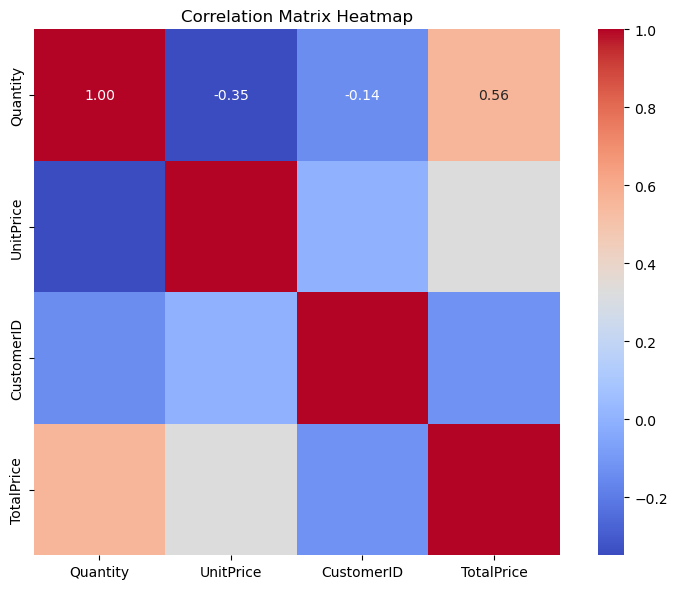

In [10]:
cov_matrix = numerical_df.cov()
corr_matrix = numerical_df.corr()

print("Covariance Matrix:")
print(cov_matrix)

print("")
print("--------------------------")
print("")

print("Correlation Matrix:")
print(corr_matrix)

print("")
print("--------------------------")
print("")

import seaborn as sns
import matplotlib.pyplot as plt

# Size of the plot
plt.figure(figsize=(8, 6))

# Correlation Matrix HeatMap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

<h2 style="color:#d36c87;">1.3. Data reduction</h2>

### Dimensionality reduction

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Select numeric columns
numeric_cols = ['Quantity', 'UnitPrice']
df_pca = df_cleaned[numeric_cols].copy()

# Clean data (remove NaNs or infinities)
df_pca = df_pca.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# Applying PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(scaled_data)

# Store/display the result
df_cleaned['PCA_1D'] = principal_component

print(f"Explained Variance by PCA component: {pca.explained_variance_ratio_[0]:.4f}")

Explained Variance by PCA component: 0.6742


In [12]:
### PCA	Simplifies feature space

### Numerosity reduction

In [13]:
numerosity_df = df_cleaned.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'PCA_1D': 'mean'  # From the PCA step
}).reset_index()

print("Numerosity reduction complete. Dataset reduced to one row per customer.")
display(numerosity_df.head())

Numerosity reduction complete. Dataset reduced to one row per customer.


CustomerID  Quantity  UnitPrice    PCA_1D
0     12354.0       376   2.429231 -0.027845
1     12357.0      1514   2.067614  0.958898
2     12361.0        90   2.038889  0.225039
3     12362.0      1979   2.454700 -0.096146
4     12364.0      1281   1.162051  1.377587

### Data compression

In [14]:
# Use reduced data
compression_data = numerosity_df[['Quantity', 'UnitPrice']]

# Calc. distance and linkage
distance_matrix = pdist(compression_data)
hierarchy_linkage = linkage(distance_matrix, method='ward')

# Assigning clusters (5)
numerosity_df['Cluster'] = fcluster(hierarchy_linkage, t=5, criterion='maxclust')

print("Data compression complete. Customers assigned to 5 clusters.")
display(numerosity_df[['CustomerID', 'Cluster']].head())

Data compression complete. Customers assigned to 5 clusters.


CustomerID  Cluster
0     12354.0        1
1     12357.0        2
2     12361.0        1
3     12362.0        4
4     12364.0        2

In [15]:
### Clustering	Compresses customer representation

<h2 style="color:#d36c87;">1.4. Data transformation and data discretization</h2>

In this part we will be identifying each category to see if there is some time of data transformation that is possible to do.

### Data Transformation

#### Data Smoothing

For this first part, the only category that shall be analyzed for such an treatment will be the UnitPrice. Let us visualize the category to take a conclusion. Since the only other category that would make sense would with time, we are using the time in the X-axis for this plot.

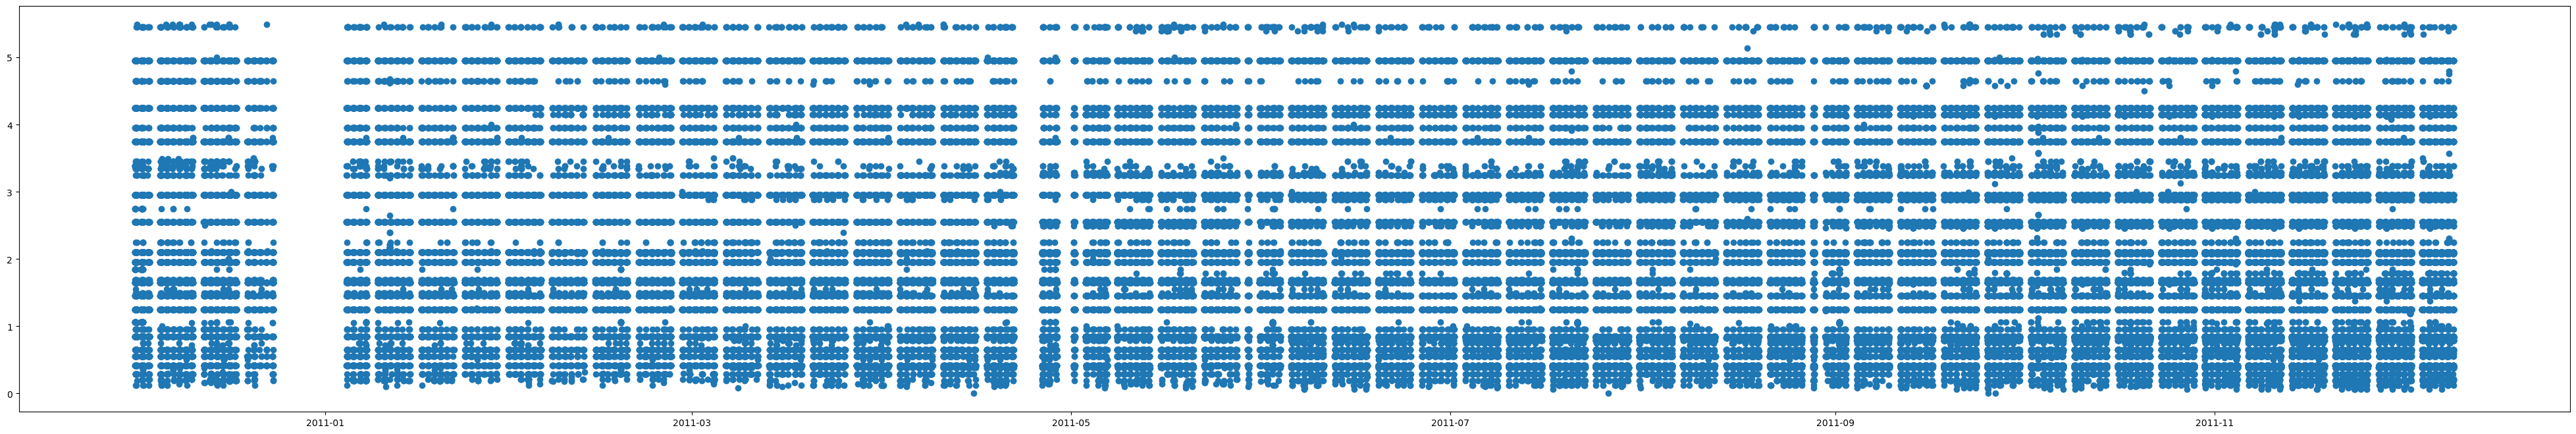

In [16]:
plt.figure(figsize=[50, 8])
plt.plot(df_cleaned['InvoiceDate'], df_cleaned['UnitPrice'], 'o')

After seeing this plot, we can clearly see that it does not make any sense to implement any smoothing algorithm since there are no appearance of any outliers. Additionally, all of the outliers have been already taken out before.

#### Data Aggregation

1. Total number of units sold by country

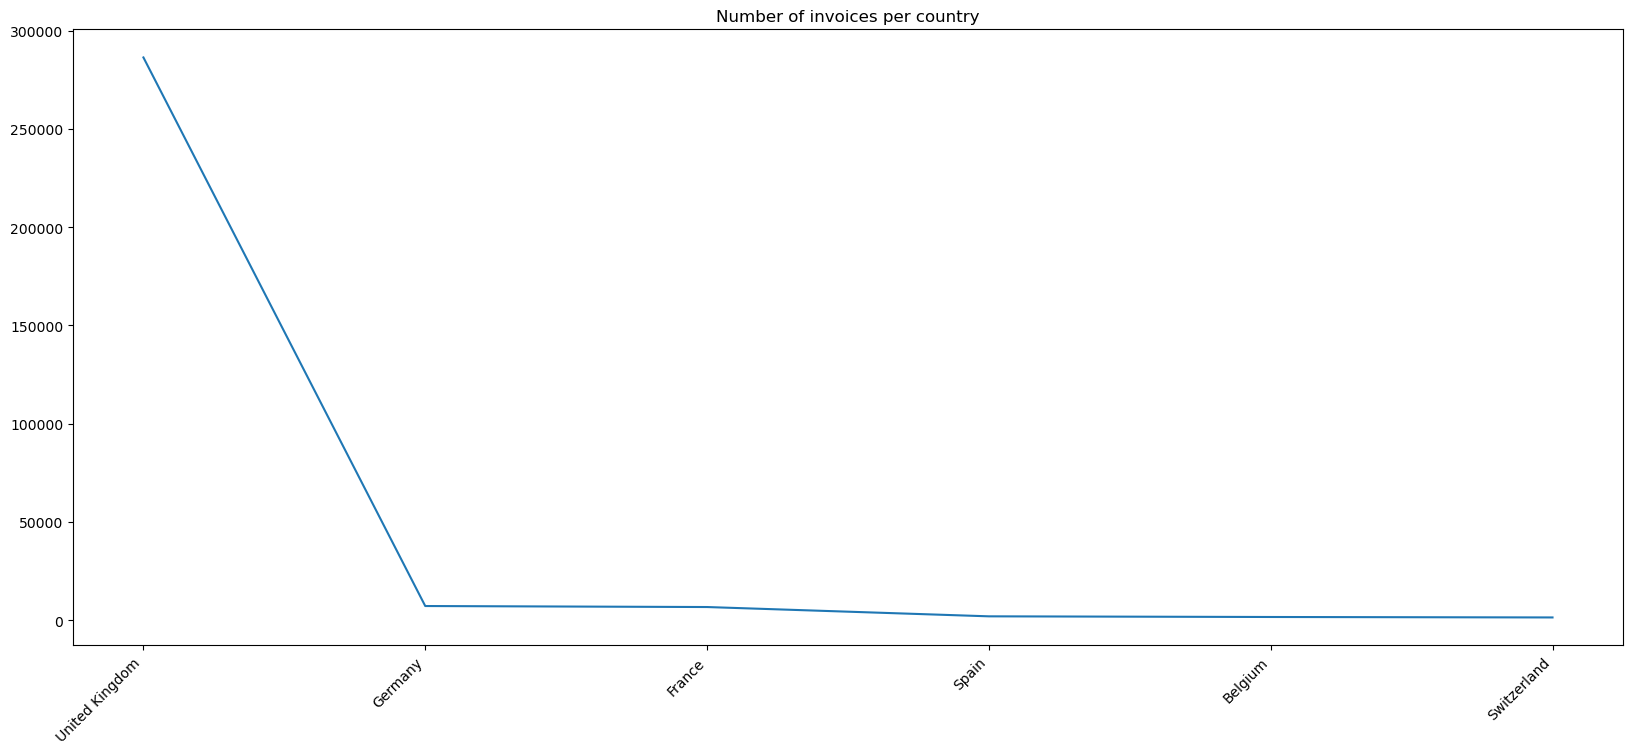

In [17]:
num_units_sold_by_country = df_cleaned.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

plt.figure(figsize=[20, 8])
plt.xticks(rotation=45, ha='right')
plt.title("Number of invoices per country")
plt.plot(num_units_sold_by_country)


Let us now see what are the country with the least invoices.

In [18]:
#Number of total invoices
total_invoices = len(np.unique(df_cleaned['InvoiceNo']))
#Setting a limit
limit = total_invoices/100

#Printing new plot
active_countries = num_units_sold_by_country[num_units_sold_by_country>=limit].index

print("Number of countries before filtering:", len(num_units_sold_by_country))
print("Number of items sold before: ", num_units_sold_by_country.sum())
print("Filtering all countries that have less that 1 percent of the total sales...")
print("Number of countries after filtering:", len(active_countries))
print("Number of items sold after: ", num_units_sold_by_country[active_countries].sum())

Number of countries before filtering: 6
Number of items sold before:  305275
Filtering all countries that have less that 1 percent of the total sales...
Number of countries after filtering: 6
Number of items sold after:  305275


Since there are clearly a lot of countries that do not contribute much to the whole dataset and could bring some undesired patterns, it is better to remove those countries from the dataset.

In [19]:
transformed_data = df_cleaned[df_cleaned['Country'].isin(active_countries)]

2. Number of costumers per country

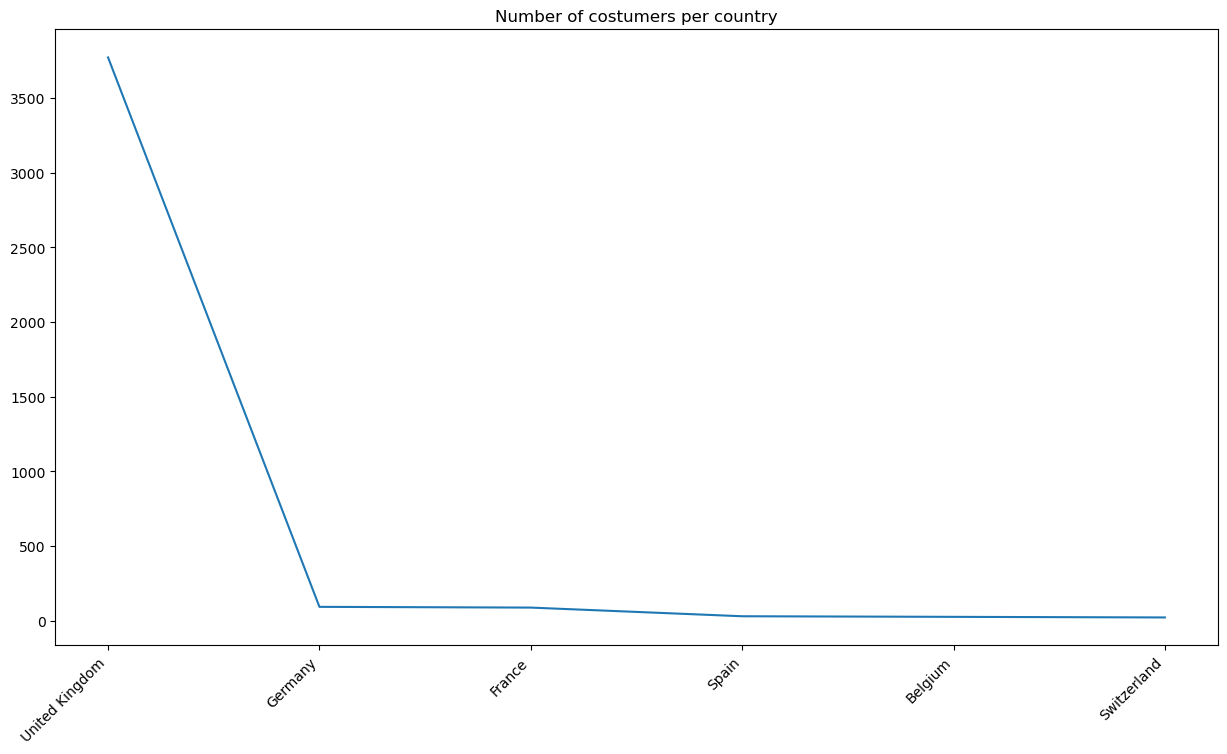

In [20]:
num_custumers_per_country = transformed_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

plt.figure(figsize=[15,8])
plt.title("Number of costumers per country")
plt.xticks(rotation=45, ha='right')
plt.plot(num_custumers_per_country)

Let us see of there are any countries that have a considerable amount of low costumers.

In [21]:
total_costumers = len(np.unique(transformed_data['CustomerID']))
costumers_limit = total_costumers/200 #Limit is 0.5 %

active_costumers = num_custumers_per_country[num_custumers_per_country >= costumers_limit].index
print("Number of countries before filtering:", len(num_custumers_per_country))
print("Number of total costumers before: ", num_custumers_per_country.sum())
print("Filtering all countries that have less that 1 percent of the total sales...")
print("Number of countries after filtering:", len(active_costumers))
print("Number of total invoices after: ", num_custumers_per_country[active_costumers].sum())

Number of countries before filtering: 6
Number of total costumers before:  4025
Filtering all countries that have less that 1 percent of the total sales...
Number of countries after filtering: 6
Number of total invoices after:  4025


Since there are clearly a lot of countries that do not have many costumers compared to the whole dataset and could bring some undesired patterns, it is better to remove those countries from the dataset.

In [22]:
transformed_data = transformed_data[transformed_data['Country'].isin(active_costumers)]

3. Sales over time (Monthly)

Month
2010-12    19942
2011-01    15962
2011-02    14869
2011-03    20412
2011-04    17344
2011-05    21195
2011-06    20255
2011-07    20410
2011-08    20438
2011-09    31168
2011-10    38154
2011-11    51317
2011-12    13809
Freq: M, Name: InvoiceNo, dtype: int64


<Axes: title={'center': 'Number of invoices per month'}, xlabel='Month'>

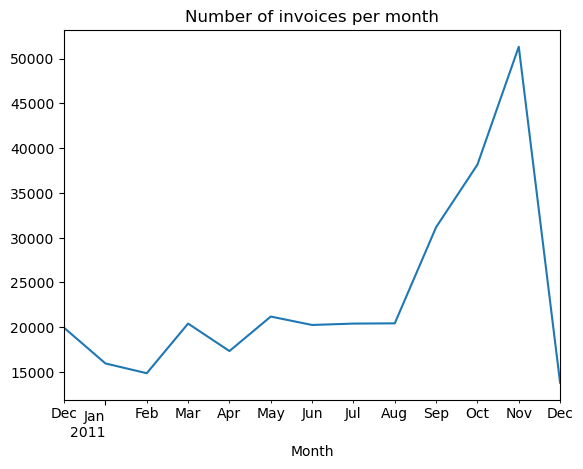

In [23]:
transformed_data['InvoiceDate'] = pd.to_datetime(transformed_data['InvoiceDate'])
transformed_data['Month'] = transformed_data['InvoiceDate'].dt.to_period('M')
transformed_data['Week'] = transformed_data['InvoiceDate'].dt.to_period('W')

monthly_sales = transformed_data.groupby(['Month'])['InvoiceNo'].count()
print(monthly_sales)

plt.xticks(rotation=45, ha='right')
plt.title("Number of invoices per month")
monthly_sales.plot()

Here, we can clearly see that that is a peek in sales during the final months of the year.

Let us now study the sales per day of the week.

<Axes: title={'center': 'Number of invoices per day of the week'}, xlabel='Day'>

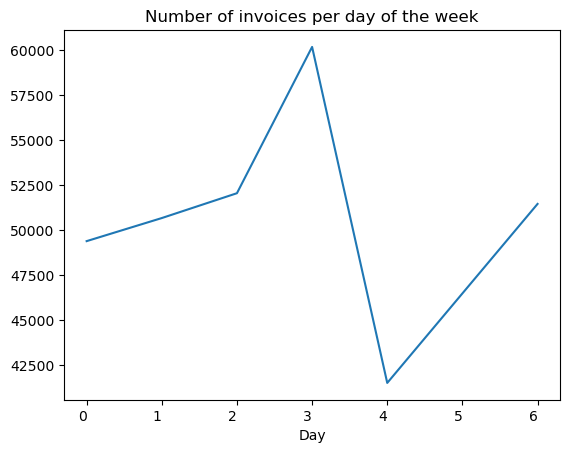

In [24]:

transformed_data['Day'] = transformed_data['InvoiceDate'].dt.weekday

day_sales = transformed_data.groupby(['Day'])['InvoiceNo'].count()


plt.xticks(rotation=45, ha='right')
plt.title("Number of invoices per day of the week")
day_sales.plot()

Here we can also see that on the day three we have a peek of sales, this being on thursday.

#### Data Normalization

For this model, we decided to not do any data normalization, this because we rather work with raw values since it will be more about doing a business analysis than training a model for example.

#### Data Discretization

Let's start by binning the UnitPrice since it is the more obvious approach here.

In [25]:
transformed_data['UnitPriceBin'] = pd.cut(transformed_data['UnitPrice'], bins = 5)

#Costumer spend
customer_spend = transformed_data.groupby('CustomerID')['TotalPrice'].sum()
transformed_data['SpendLevel'] = pd.qcut(transformed_data['CustomerID'].map(customer_spend), q=4, labels=['Low', 'Med', 'High', 'Very High'])
transformed_data['GeneralCountry'] = np.where(transformed_data['Country'] == 'United Kingdom', 'United Kingdom', 'Others')



#Other ideas
    #Countries (In and out of UK)
    # # of items purchased -> should be discussed in the future
    #...


# Saving the Csv file
transformed_data.to_csv("Dataset_Online_Retail_Cleaned_Transformed.csv", index=False)

print("Showing first 5 elements")
transformed_data.tail()

Showing first 5 elements


InvoiceNo StockCode                      Description  Quantity  \
319747     581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
319748     581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
319749     581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
319750     581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
319751     581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
319747 2011-12-09 12:50:00       0.85     12680.0  France       10.20   
319748 2011-12-09 12:50:00       2.10     12680.0  France       12.60   
319749 2011-12-09 12:50:00       4.15     12680.0  France       16.60   
319750 2011-12-09 12:50:00       4.15     12680.0  France       16.60   
319751 2011-12-09 12:50:00       4.95     12680.0  France       14.85   

          PCA_1D    Month                   Week  Day       UnitPriceBin  \
319747  1.089613  2011-12  2011-12-05/2011-12-11    4  (-0.00449, 1.099]   
319748 -0.224951  2011-12  2011-12-05/2011-12-11    4     (1.099, 2.197]   
319749 -1.564991  2011-12  2011-12-05/2011-12-11    4     (3.294, 4.392]   
319750 -1.564991  2011-12  2011-12-05/2011-12-11    4     (3.294, 4.392]   
319751 -2.110776  2011-12  2011-12-05/2011-12-11    4      (4.392, 5.49]   

       SpendLevel GeneralCountry  
319747        Low         Others  
319748        Low         Others  
319749        Low         Others  
319750        Low         Others  
319751        Low         Others

---
# 2. Data Visualization

<h2 style="color:#d36c87;">2.1. Services</h2>

### Grand level (Charlie)

What to do:

- Box plots with all numerical variables (Quantity, UnitPrice)

- Can also do some with totalPrice

In [32]:
!pip install pycountry
#Code for Charlie

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB 445.2 kB/s eta 0:00:15
    --------------------------------------- 0.1/6.3 MB 1.2 MB/s eta 0:00:06
   - -------------------------------------- 0.2/6.3 MB 1.5 MB/s eta 0:00:04
   - -------------------------------------- 0.3/6.3 MB 1.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/6.3 MB 2.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/6.3 MB 2.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.3 MB 1.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.3 MB 1.7 MB/s eta 0:00:04
   ---- ----------------------------------- 0.7/6.3 MB 1.8 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/6.3 MB 1.7 MB/s eta 0:00:04
   ----- ---------------------------------- 0.9/6.3 MB 1.7 MB/s eta 0:00:04
   ------ --------------------------------- 1.0/6.3 MB 1.8 MB/s eta 0:00:03
   ------- ------

### Countries

1. World Map

In [33]:
import plotly.express as px
import pycountry

sales_per_country = (
    transformed_data.groupby('Country')['TotalPrice']
    .sum()
    .reset_index()
    .rename(columns={'TotalPrice': 'TotalSales'})
)

total_sales = sales_per_country['TotalSales'].sum()
sales_per_country['SalesPercentage'] = (sales_per_country['TotalSales'] / total_sales) * 100

def country_to_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

sales_per_country['iso_alpha'] = sales_per_country['Country'].apply(country_to_iso3)
sales_per_country = sales_per_country.dropna(subset=['iso_alpha'])

min_val = sales_per_country['SalesPercentage'].min()
max_val = sales_per_country['SalesPercentage'].max()

range_min = min_val
range_max = max_val

fig = px.choropleth(
    sales_per_country,
    locations='iso_alpha',
    color='SalesPercentage',
    hover_name='Country',
    hover_data={'SalesPercentage': True, 'Country': True},
    title='Sales Distribution by Country (%)',
    color_continuous_scale='YlGnBu',  # Use YlGnBu color scale
    range_color=(range_min, range_max)
)

fig.update_traces(colorbar_tickformat='%{value:.1f}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(
        title="% of Total Sales",
        ticksuffix='%',
    ),
    showlegend=False
)

fig.show()

sales_table = sales_per_country[['Country', 'SalesPercentage']].sort_values(by='SalesPercentage', ascending=False)
print(sales_table)

          Country  SalesPercentage
5  United Kingdom        91.091485
2         Germany         3.504828
1          France         3.145517
3           Spain         0.763314
4     Switzerland         0.761277
0         Belgium         0.733579


2. Sales Share: UK vs Others

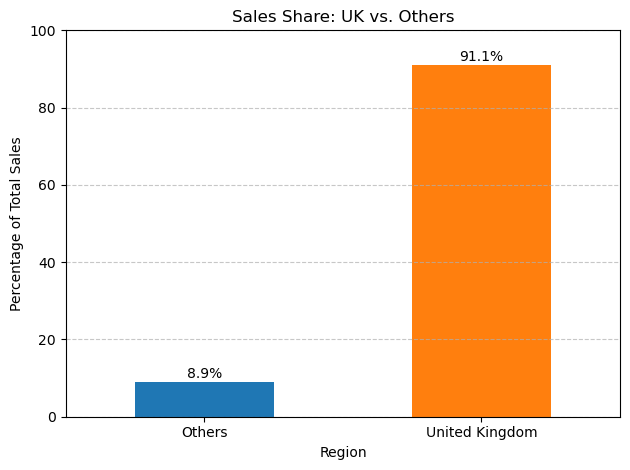

In [29]:
sales_by_region = transformed_data.groupby('GeneralCountry')['TotalPrice'].sum()

sales_percent = (sales_by_region / sales_by_region.sum()) * 100

colors = ['#1f77b4', '#ff7f0e']  # UK in blue, Others in orange
sales_percent.plot(kind='bar', color=colors)

plt.title('Sales Share: UK vs. Others')
plt.ylabel('Percentage of Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(sales_percent):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center')

plt.tight_layout()
plt.show()

### Sold Items

1. Number of sold items per country

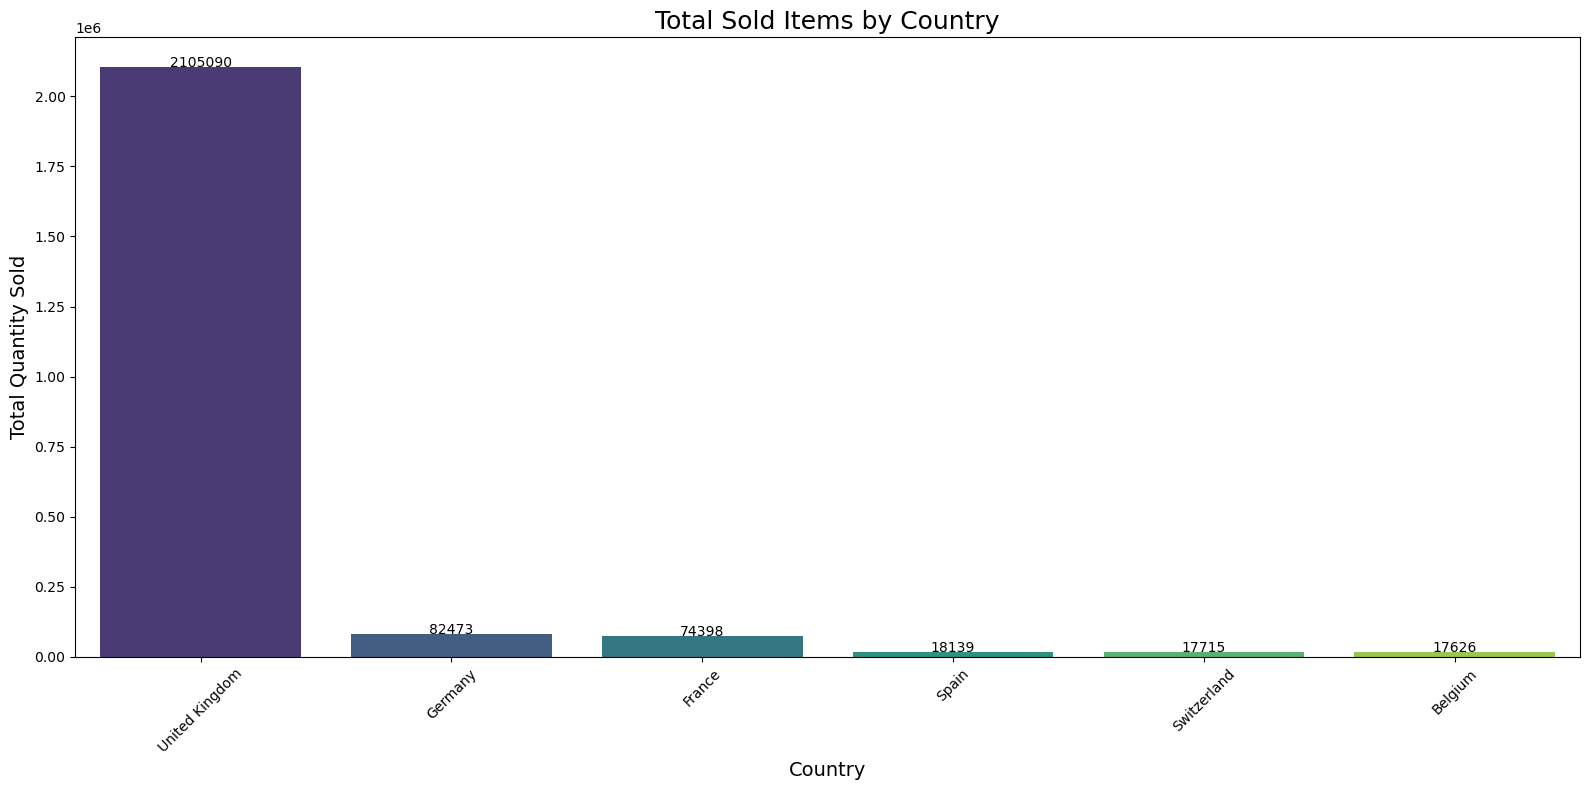

In [38]:
import seaborn as sns

# Group by country and sum quantities
sold_items_by_country = (
    transformed_data.groupby('Country')['Quantity']
    .sum()
    .reset_index()
    .sort_values('Quantity', ascending=False)
)

# Drop missing values if any
sold_items_by_country = sold_items_by_country.dropna(subset=['Quantity'])

# Plotting
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='Country',
    y='Quantity',
    hue='Country',         # Color-coded by country
    data=sold_items_by_country,
    dodge=False,
    palette='viridis'
)

# Annotate bars safely
for bar in ax.patches:
    height = bar.get_height()
    if not np.isnan(height):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 50,
            f'{int(height)}',
            ha='center'
        )

# Final styling
ax.set_title('Total Sold Items by Country', fontsize=18)
ax.set_ylabel('Total Quantity Sold', fontsize=14)
ax.set_xlabel('Country', fontsize=14)
plt.xticks(rotation=45)
ax.legend().remove()  # Hide duplicated legend

plt.tight_layout()
plt.show()


2. The 10 most sold items as well as the number of sales

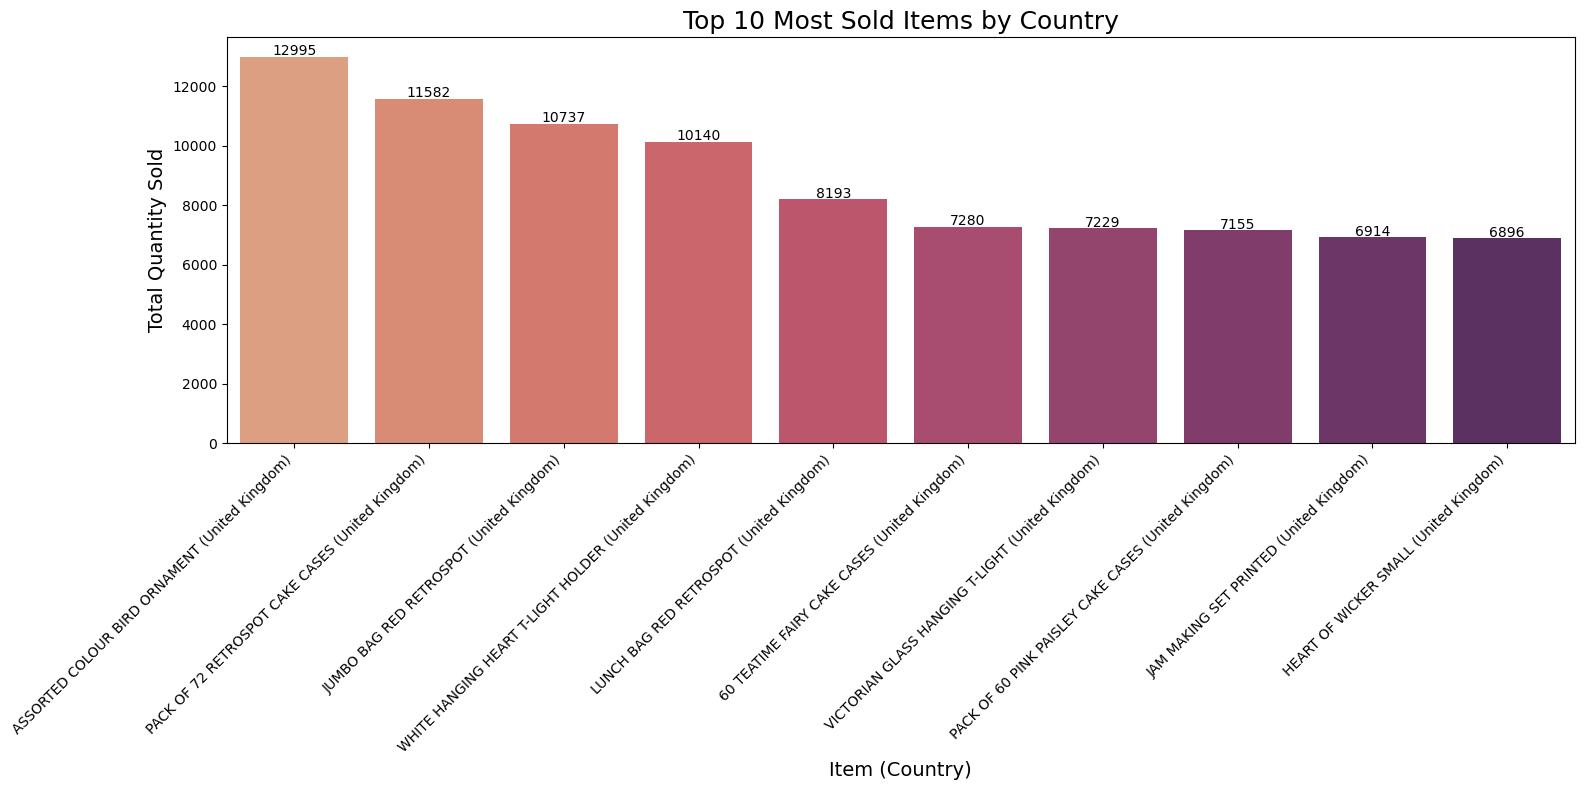

In [39]:
import seaborn as sns

# Step 1: Get the top 10 most sold item-country pairs
top_items_country = (
    transformed_data
    .groupby(['Description', 'Country'])['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Step 2: Create a combined label for better x-axis representation
top_items_country['Label'] = top_items_country['Description'] + ' (' + top_items_country['Country'] + ')'

# Step 3: Drop any rows with NaN in Quantity just to be safe
top_items_country = top_items_country.dropna(subset=['Quantity'])

# Step 4: Plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='Label',
    y='Quantity',
    hue='Label',
    data=top_items_country,
    dodge=False,
    palette='flare'
)

# Step 5: Add text labels above bars, safely handling NaNs
for bar in ax.patches:
    height = bar.get_height()
    if not np.isnan(height):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 50,
            f'{int(height)}',
            ha='center'
        )

# Step 6: Final styling
ax.set_title('Top 10 Most Sold Items by Country', fontsize=18)
ax.set_ylabel('Total Quantity Sold', fontsize=14)
ax.set_xlabel('Item (Country)', fontsize=14)
plt.xticks(rotation=45, ha='right')
ax.legend().remove()  # Remove redundant legend

plt.tight_layout()
plt.show()


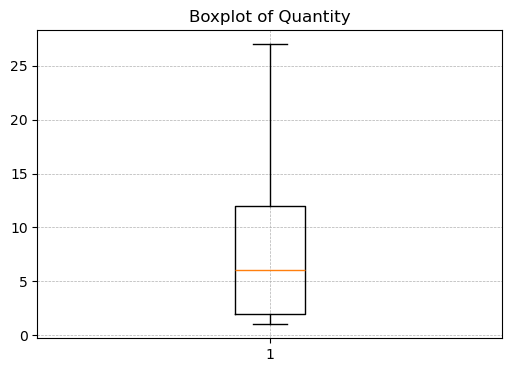

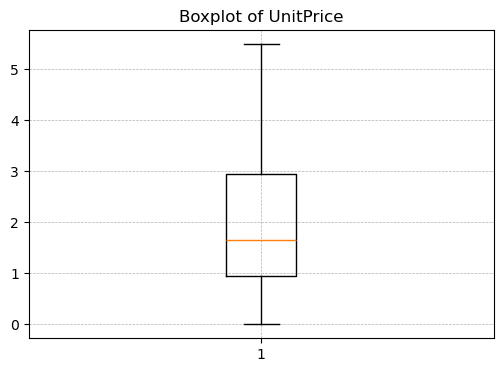

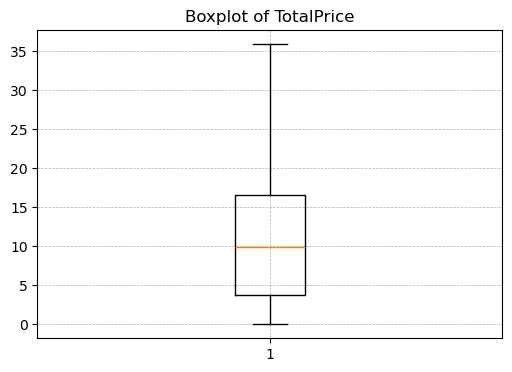

In [35]:
# Ensure TotalPrice is available
if 'TotalPrice' not in transformed_data.columns:
    transformed_data['TotalPrice'] = transformed_data['Quantity'] * transformed_data['UnitPrice']

# Create box plots for each numerical column
numerical_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(transformed_data[col], sym='')  # sym='' hides outlier points
    plt.title(f'Boxplot of {col}')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

<h2 style="color:#d36c87;">2.2. Clients</h2>

### Clients / sales (André)

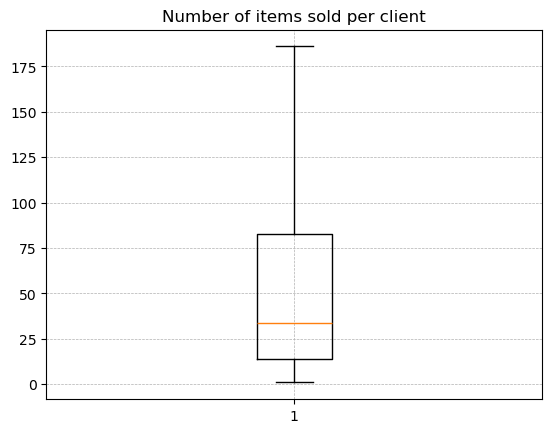

In [40]:
#Code for Andre

#Getting all invoices
customer_number_items = transformed_data.groupby('CustomerID')['InvoiceNo'].count()

plt.title('Number of items sold per client')
plt.boxplot(customer_number_items, sym= '')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


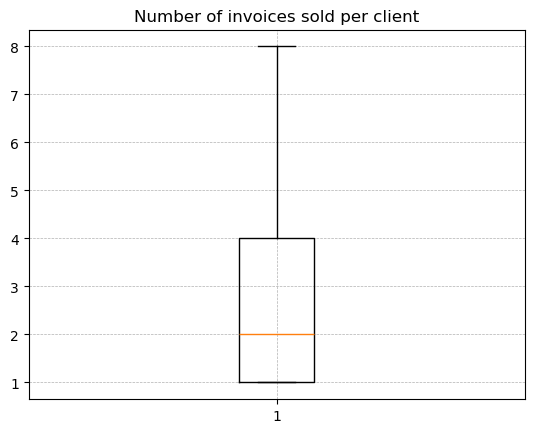

In [41]:
# Visualizing the number of invoices per client

customer_number_invoices_array = transformed_data.groupby('CustomerID')['InvoiceNo'].unique()
customer_number_invoices = np.zeros(len(customer_number_invoices_array))
counter = 0

for i in customer_number_invoices_array:
    numOfInvoices = len(i)
    customer_number_invoices[counter] = numOfInvoices
    counter += 1

plt.title('Number of invoices sold per client')
plt.boxplot(customer_number_invoices, sym= '')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

### Sales / time (André)

<Axes: title={'center': 'Number of invoices per week'}, xlabel='Week'>

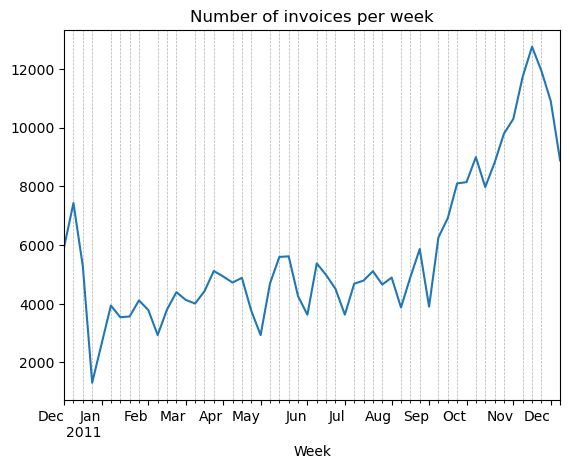

In [42]:
#Code for Andre

weekly_sales = transformed_data.groupby(['Week'])['InvoiceNo'].count()
plt.xticks(rotation=45, ha='right')
plt.title("Number of invoices per week")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
weekly_sales.plot()


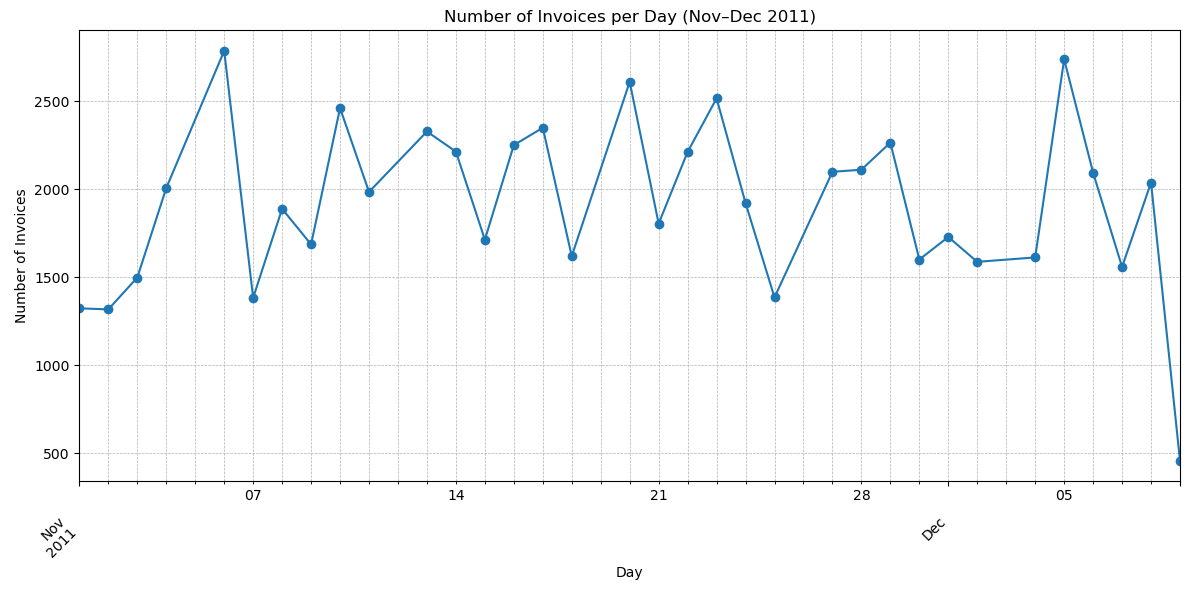

In [48]:
# Filter for Nov–Dec 2011 and make a copy
mask = (transformed_data['Month'] >= pd.Period('2011-11')) & (transformed_data['Month'] <= pd.Period('2011-12'))
big_sales_sub_group = transformed_data[mask].copy()

# Add day period safely
big_sales_sub_group['Day'] = big_sales_sub_group['InvoiceDate'].dt.to_period('D')

# Group and count invoices by day
weekly_big_sales = big_sales_sub_group.groupby(['Day'])['InvoiceNo'].count()

# Plotting
plt.figure(figsize=(12, 6))
weekly_big_sales.plot(marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Number of Invoices per Day (Nov–Dec 2011)")
plt.xlabel("Day")
plt.ylabel("Number of Invoices")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Expenses (Charlie)

What to do:

- Pie chart about "SepndLevel"

- Some other ideas that could pop up in your mind

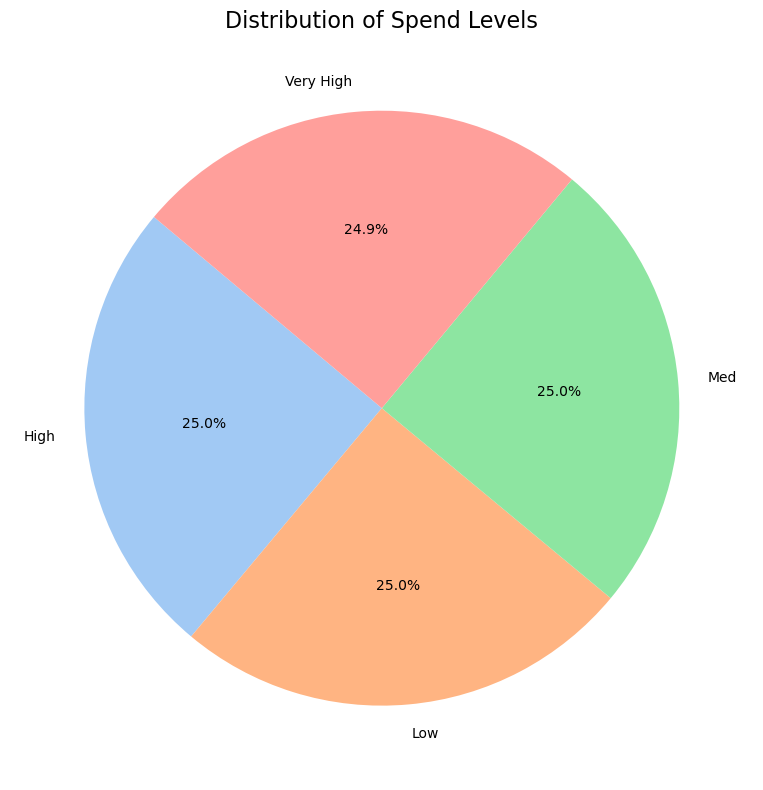

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of entries per spend level
spend_counts = df['SpendLevel'].value_counts().sort_index()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    spend_counts,
    labels=spend_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title('Distribution of Spend Levels', fontsize=16)
plt.tight_layout()
plt.show()


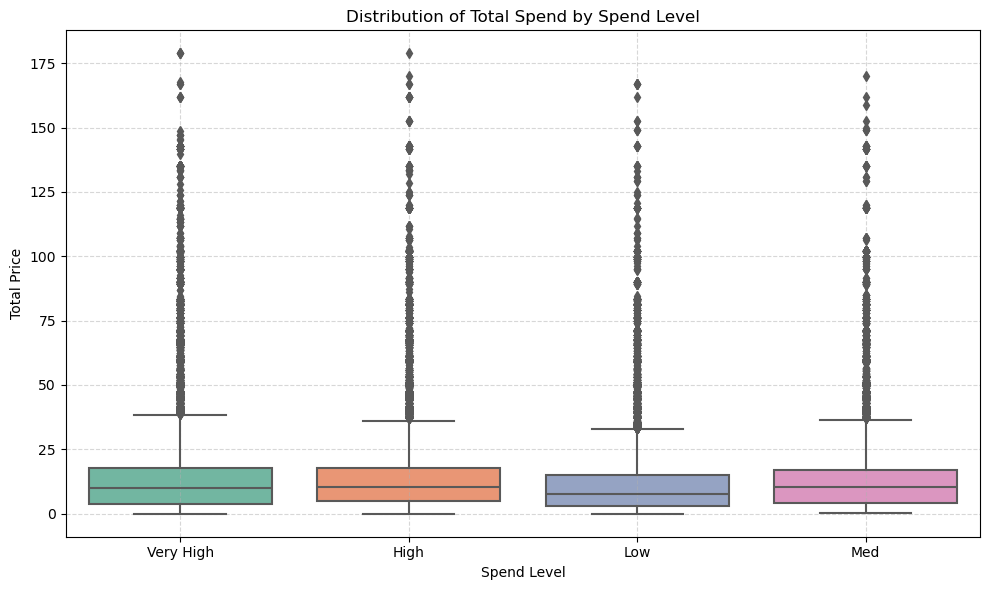

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SpendLevel', y='TotalPrice', palette='Set2')
plt.title('Distribution of Total Spend by Spend Level')
plt.xlabel('Spend Level')
plt.ylabel('Total Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
